# SAAS Intermediate Project

### BoardGameGeek - Board Game Dataset

https://www.kaggle.com/mrpantherson/board-game-data

This dataset gives information on the top 5000 board games, as rated by BoardGameGeek, the gold standard rating site for tabletop gaming enthusiasts.

The meaning of the columns:
* rank - The overall ranking of the game
* bgg_url - The link to the game's page on the BoardGameGeek website
* game_id - A unique identifier number for the game
* names - The name of the game
* min_players - The minimum number of players required to play the game
* max_players - The maximum number of players that can play the game
* avg_time - The average time the game takes to play
* min_time - The minimum time the game takes to play
* max_time - The maximum time the game takes to play
* year - The year the game was released
* avg_rating - The average rating of the game among all site users
* geek_rating - The average rating of the game among "elite" users
* num_votes - The number of times the game has been rated
* image_url - URL of an image of the game
* age - Minimum recommended age for the game
* mechanic - List of mechanics the game has
* owned - How many people on BoardGameGeek say they have the game
* category - List of genres the game is in
* designer - Who designed the game
* weight - How complex the game is, on a scale of 1-5

## Import useful libraries & extraneous

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
import csv
import zipfile
from pathlib import Path
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## 2. Exploratory Data Analysis (EDA)

When you first start working with a dataset, it is often a good idea to just play around with the data to get an idea of what you're working with. This can help you make decisions about which parts of your data may be more useful than others, and also give us a basis for sanity checks later on when our code becomes more complicated. For example, in the the wines dataset we may see that the "quality" feature only ranges from 3 to 8, so if our model predicts a quality of 73 then we know there's something wrong!

### 2.1. - df.head()

One easy way to see what your dataset looks like is by using the `.head()` function, which will display the first five rows of your dataframe. Remember to replace `df` with the name of your dataset!

In [3]:
games  = pd.read_csv("data/bgg_db_1806.csv")
games.head()


,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,8.98893,8.61858,15376,https://cf.geekdo-images.com/original/img/lDN3...,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66140,8.50163,26063,https://cf.geekdo-images.com/original/img/P_Sw...,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.60673,8.30183,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3678
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,8.38461,8.19914,26004,https://cf.geekdo-images.com/original/img/o8z_...,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,8.33954,8.19787,31301,https://cf.geekdo-images.com/original/img/ZPnn...,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518


### 2.2. - df.info() and df.describe()

Although the `.head()` function is a convenient way to peek at your dataset, it's important to remember that it only gives you the first few rows. Especially in cases when you're trying to read data from some poorly-formatted csv, it's not uncommon for everything to be fine in the first few rows of your data (so that the `.head()` output looks normal) but then at some point everything turns into `NaN`s. In order to avoid this kind of problem, pandas has other functions that let you look at your data from a broader perspective. The `.info()` function will give you information about what kind of data each of your columns contains, and the `.describe()` function will give you summary statistics for each column.<span style="color:blue"> Try them out!</span>

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 20 columns):
rank           4999 non-null int64
bgg_url        4999 non-null object
game_id        4999 non-null int64
names          4999 non-null object
min_players    4999 non-null int64
max_players    4999 non-null int64
avg_time       4999 non-null int64
min_time       4999 non-null int64
max_time       4999 non-null int64
year           4999 non-null int64
avg_rating     4999 non-null float64
geek_rating    4999 non-null float64
num_votes      4999 non-null int64
image_url      4998 non-null object
age            4999 non-null int64
mechanic       4999 non-null object
owned          4999 non-null int64
category       4999 non-null object
designer       4999 non-null object
weight         4999 non-null float64
dtypes: float64(3), int64(11), object(6)
memory usage: 781.2+ KB


In [7]:
games.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,89130.612523,2.019404,5.188038,116.193639,83.852971,115.717544,1997.739948,6.969392,6.088576,2013.458292,10.407281,3063.863573,2.343633
std,1443.231328,77203.598778,0.685282,7.801038,513.710907,317.251581,513.768868,143.192968,0.562825,0.483212,4750.834210,3.237645,6482.861008,0.808694
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,5.777730,5.640240,62.000000,0.000000,49.000000,0.000000
25%,1250.500000,11169.000000,2.000000,4.000000,30.000000,30.000000,30.000000,2003.000000,6.540560,5.726970,285.000000,8.000000,626.000000,1.735300
50%,2500.000000,71906.000000,2.000000,4.000000,60.000000,45.000000,60.000000,2010.000000,6.907890,5.905240,625.000000,11.000000,1204.000000,2.285700
75%,3749.500000,160456.500000,2.000000,6.000000,120.000000,90.000000,120.000000,2015.000000,7.339040,6.303585,1634.500000,12.000000,2751.500000,2.888900
max,4999.000000,248949.000000,8.000000,200.000000,22500.000000,17280.000000,22500.000000,2018.000000,9.159150,8.618580,77423.000000,42.000000,111807.000000,4.904800


### 2.3. More data-specific analysis

After running the above functions, you have some general information about what your data looks like, so you can start running analyses that are more specific to the dataset you're working with. <span style="color:blue">For these parts, pick two quantitative columns of your data - one that you're interested in predicting, which I will call $y$, and one that you think will be predictive of $y$, which I will call $x$. After you've selected these columns, filter the rows of your data into two subsets - one where the $x$ value is smaller than the mean $x$ value, and one where the $x$ value is larger than the mean $x$ value.</span>

In [33]:
mean_x = np.mean(games['weight'])
smaller_x_subset = games[games['weight'] < mean_x]
larger_x_subset = games[games['weight'] > mean_x]

Then, print the mean of $y$ in both of these subsets.

In [43]:
smaller_x_subset_y_mean = smaller_x_subset['avg_rating'].mean()
larger_x_subset_y_mean  = larger_x_subset['avg_rating'].mean()
print("Mean y in smaller x:", smaller_x_subset_y_mean, "Mean y in larger x:", larger_x_subset_y_mean)

Mean y in smaller x: 6.723426173584907 Mean y in larger x: 7.246876819923372


We see that there is a difference in the mean of each subset. How interesting!

**BONUS**: If we want to try this analysis with a different pair of columns for $x$ and $y$, it would be good coding practice to define a function for this task instead of copying our previous code and changing the column names. <span style="color:blue"> Try making a function that takes in the names of two columns for $x$ and $y$ and performs the above operations. </span>

In [44]:
def print_subsetted_y_means(df,x_name,y_name):
    """
    Prints the mean of y where x is smaller than the mean of x, and where x is larger than the mean of x.
    
    df: The dataframe containing our data.
    x_name: The name of the x column.
    y_name: The name of the y column.
    """
    
    mean_x = np.mean(df[x_name])
    smaller_x_subset = df[df[x_name] < mean_x]
    larger_x_subset = df[df[x_name] > mean_x]
    smaller_x_subset_y_mean = smaller_x_subset[y_name].mean()
    larger_x_subset_y_mean  = larger_x_subset[y_name].mean()
    print("Mean y in smaller x:", smaller_x_subset_y_mean, "Mean y in larger x:", larger_x_subset_y_mean)

Let's test this function to make sure it outputs correctly.

In [45]:
print_subsetted_y_means(games, 'weight', 'avg_rating')

Mean y in smaller x: 6.723426173584907 Mean y in larger x: 7.246876819923372


Looks good as it works as intended!

### 2.4. Creating new features

When we get to modeling later in the semester, we often don't just want to use the data as it was given to us; instead, we can transform the data into new **features** which we think may be more useful. For example, suppose we thought that instead of using $x$ to predict $y$, we thought that $x^2$ would be more useful in predicting $y$. <span style="color:blue">Add a new column to your dataframe that contains $x^2$ instead of $x$.</span>

In [63]:
games['weight squared'] = games['weight']**2
games.head()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,...,num_votes,image_url,age,mechanic,owned,category,designer,weight,weight squared,greater than x_mean
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,...,15376,https://cf.geekdo-images.com/original/img/lDN3...,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543,14.094768,1
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,...,26063,https://cf.geekdo-images.com/original/img/P_Sw...,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210,7.958041,1
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,...,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3678,19.077677,1
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,...,26004,https://cf.geekdo-images.com/original/img/o8z_...,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456,10.533919,1
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,...,31301,https://cf.geekdo-images.com/original/img/ZPnn...,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518,12.615283,1


In addition to polynomial features like $x^2$ above, another common kind of feature is an **indicator variable** which is equal to 1 if some condition is true, and zero otherwise. For example, maybe we now think that the actual value of $x$ doesn't matter; all that's important is whether or not $x$ is greater than its mean. <span style="color:blue"> Add another column to your data that is equal to 1 if $x$ is greater than its mean, and zero otherwise. </span>

In [62]:
games['greater than x_mean'] = (games['weight'] > games['weight'].mean()).astype(int)
games.tail()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,...,num_votes,image_url,age,mechanic,owned,category,designer,weight,weight squared,greater than x_mean
4994,4995,https://boardgamegeek.com/boardgame/6569/cronberg,6569,Cronberg,2,4,20,20,20,2003,...,456,https://cf.geekdo-images.com/original/img/pBmQ...,8,"Area Enclosure, Tile Placement",561,"City Building, Print & Play","Tobias Goslar, Roland Goslar",1.9074,3.638175,0
4995,4996,https://boardgamegeek.com/boardgame/42713/arca...,42713,Arcane Legions,2,6,120,60,120,2009,...,277,https://cf.geekdo-images.com/original/img/Ea2O...,10,"Action Point Allowance System, Dice Rolling, V...",825,"Ancient, Collectible Components, Dice, Fantasy...","Tyler Bielman, Jonathon Loucks, Ethan Pasterna...",2.3750,5.640625,1
4996,4997,https://boardgamegeek.com/boardgame/836/new-en...,836,New England Railways,3,6,120,120,120,2000,...,146,https://cf.geekdo-images.com/original/img/2EXT...,13,"Auction/Bidding, Pick-up and Deliver",440,"Economic, Trains","John Bohrer, Martin Wallace",2.6250,6.890625,1
4997,4998,https://boardgamegeek.com/boardgame/2997/soldi...,2997,Soldier Kings,2,8,240,240,240,2002,...,257,https://cf.geekdo-images.com/original/img/eNqF...,14,"Point to Point Movement, Variable Player Powers",659,"Age of Reason, Wargame",Robert G. Markham,2.4359,5.933609,1
4998,4999,https://boardgamegeek.com/boardgame/128174/dra...,128174,Dragon Farkle,2,5,30,30,30,2015,...,283,https://cf.geekdo-images.com/original/img/7iS6...,13,"Card Drafting, Dice Rolling",629,Fantasy,Robert J. Hudecek,1.6000,2.560000,0


## 3. Plotting

In this checkpoint, let's practice making some plots! For all of these parts, try to make your graphs presentation-ready; add a title, axis labels, and a legend if necessary. Someone else should be able to look at your graph and understand what it's saying without you explaining what's going on! **Also, make sure you make at least one plot using matplotlib and at least one plot using seaborn.**

### 3.1. Scatterplots

First, pick an $x$ and $y$ variable like last time where you think that $x$ may be able to predict $y$ - you can use the same variables as from the previous part, or try out new ones. <span style="color:blue"> Let's first try making a simple scatterplot of $x$ and $y$.

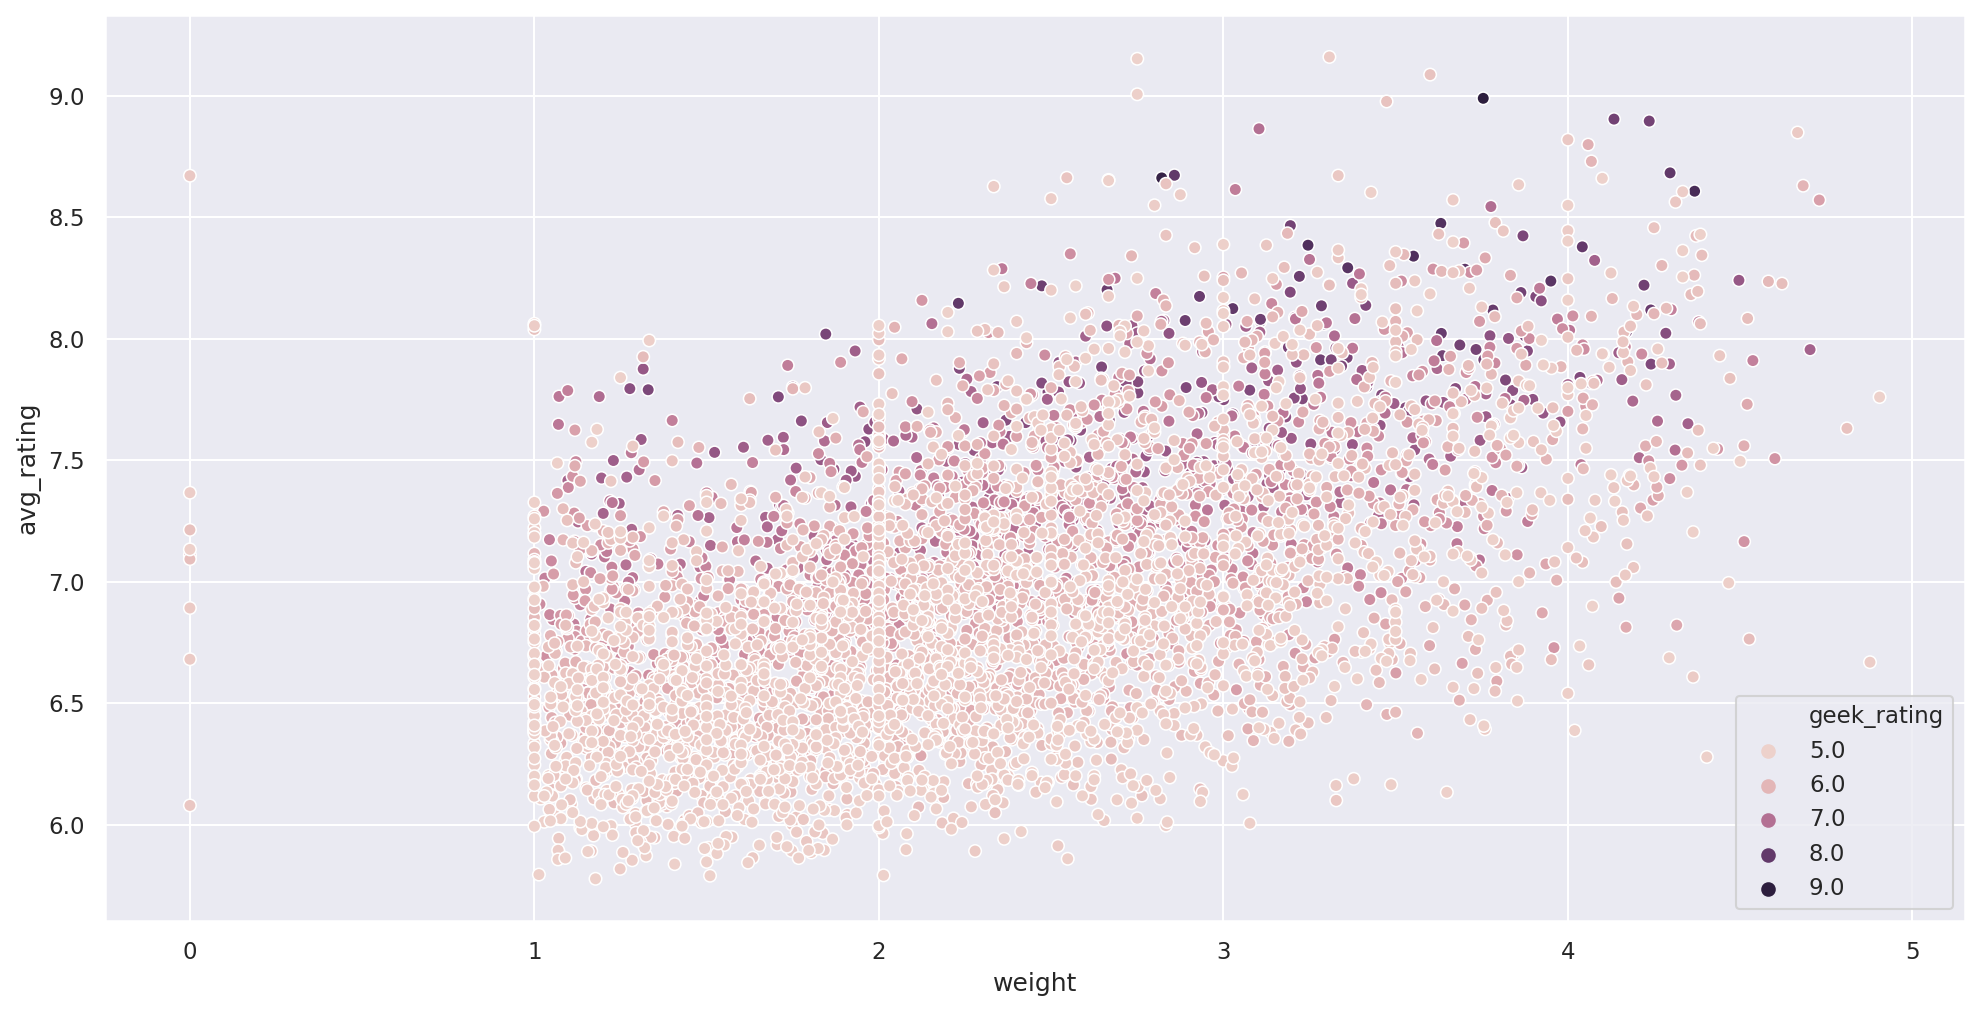

In [71]:
sns.scatterplot(games['weight'], games['avg_rating'], hue = games['geek_rating']);

### 3.2. Histograms

<span style="color:blue">First, pick one of the variables in your dataset and make a histogram of that variable.

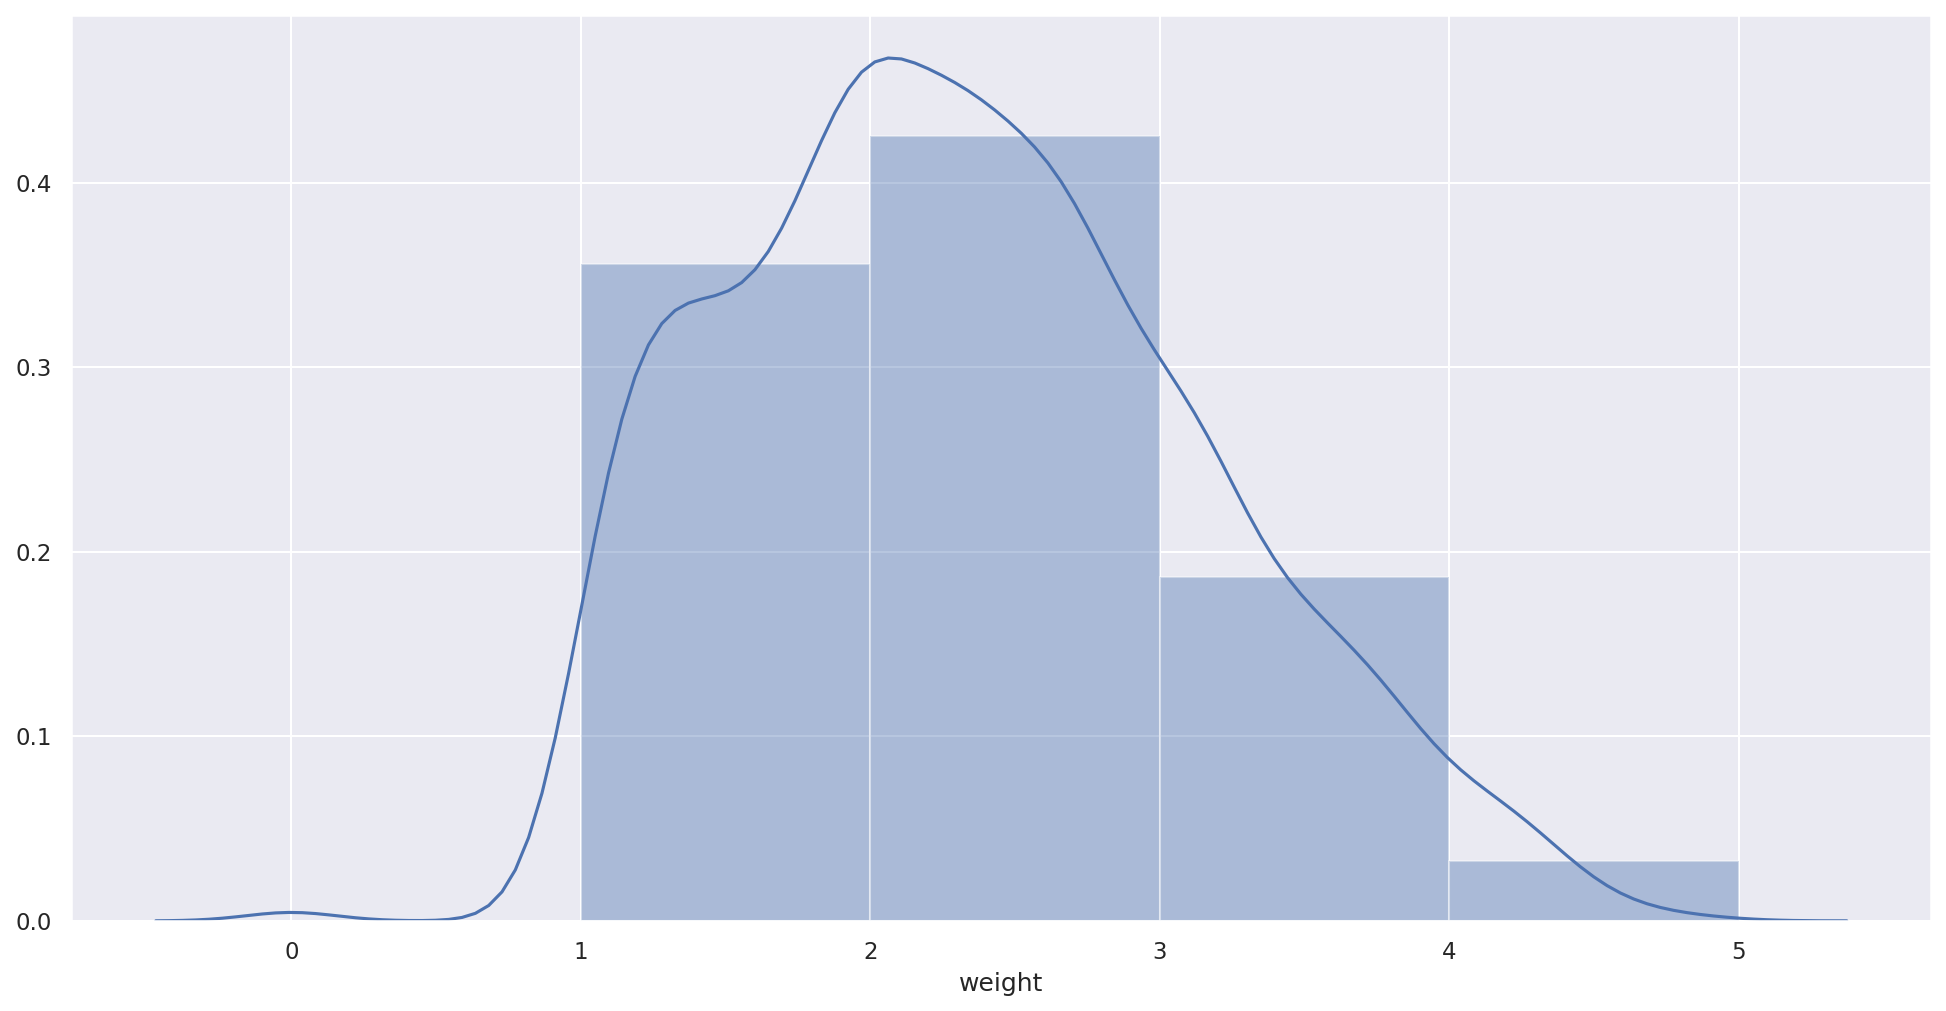

In [87]:
sns.distplot(games['weight'], label='weight', bins = np.array([1,2,3,4,5]), kde = True)

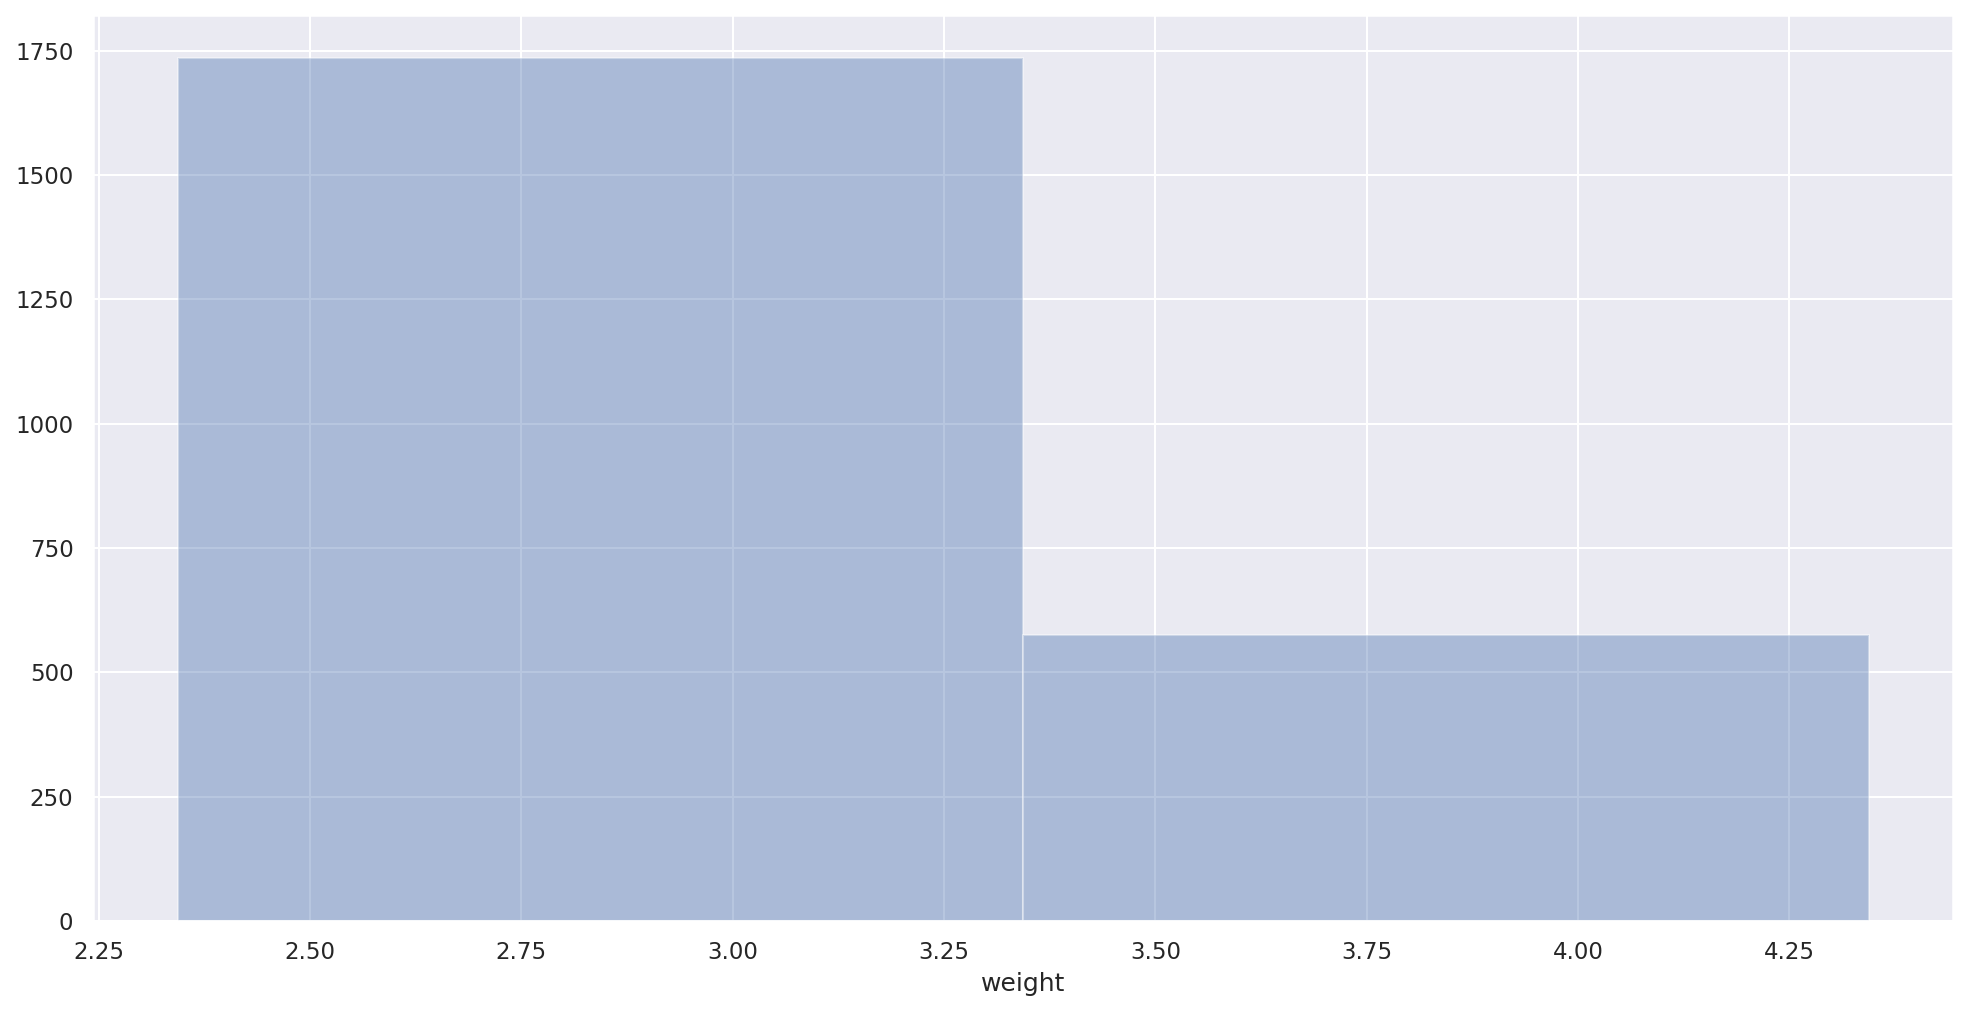

In [88]:
sns.distplot(games['weight'], label='weight', bins = np.arange(games['weight'].mean(),5), kde = False)

### 3.3. Other graphs and comparisons

Text(0.5, 1.0, 'Distribution of geek and average ratings')

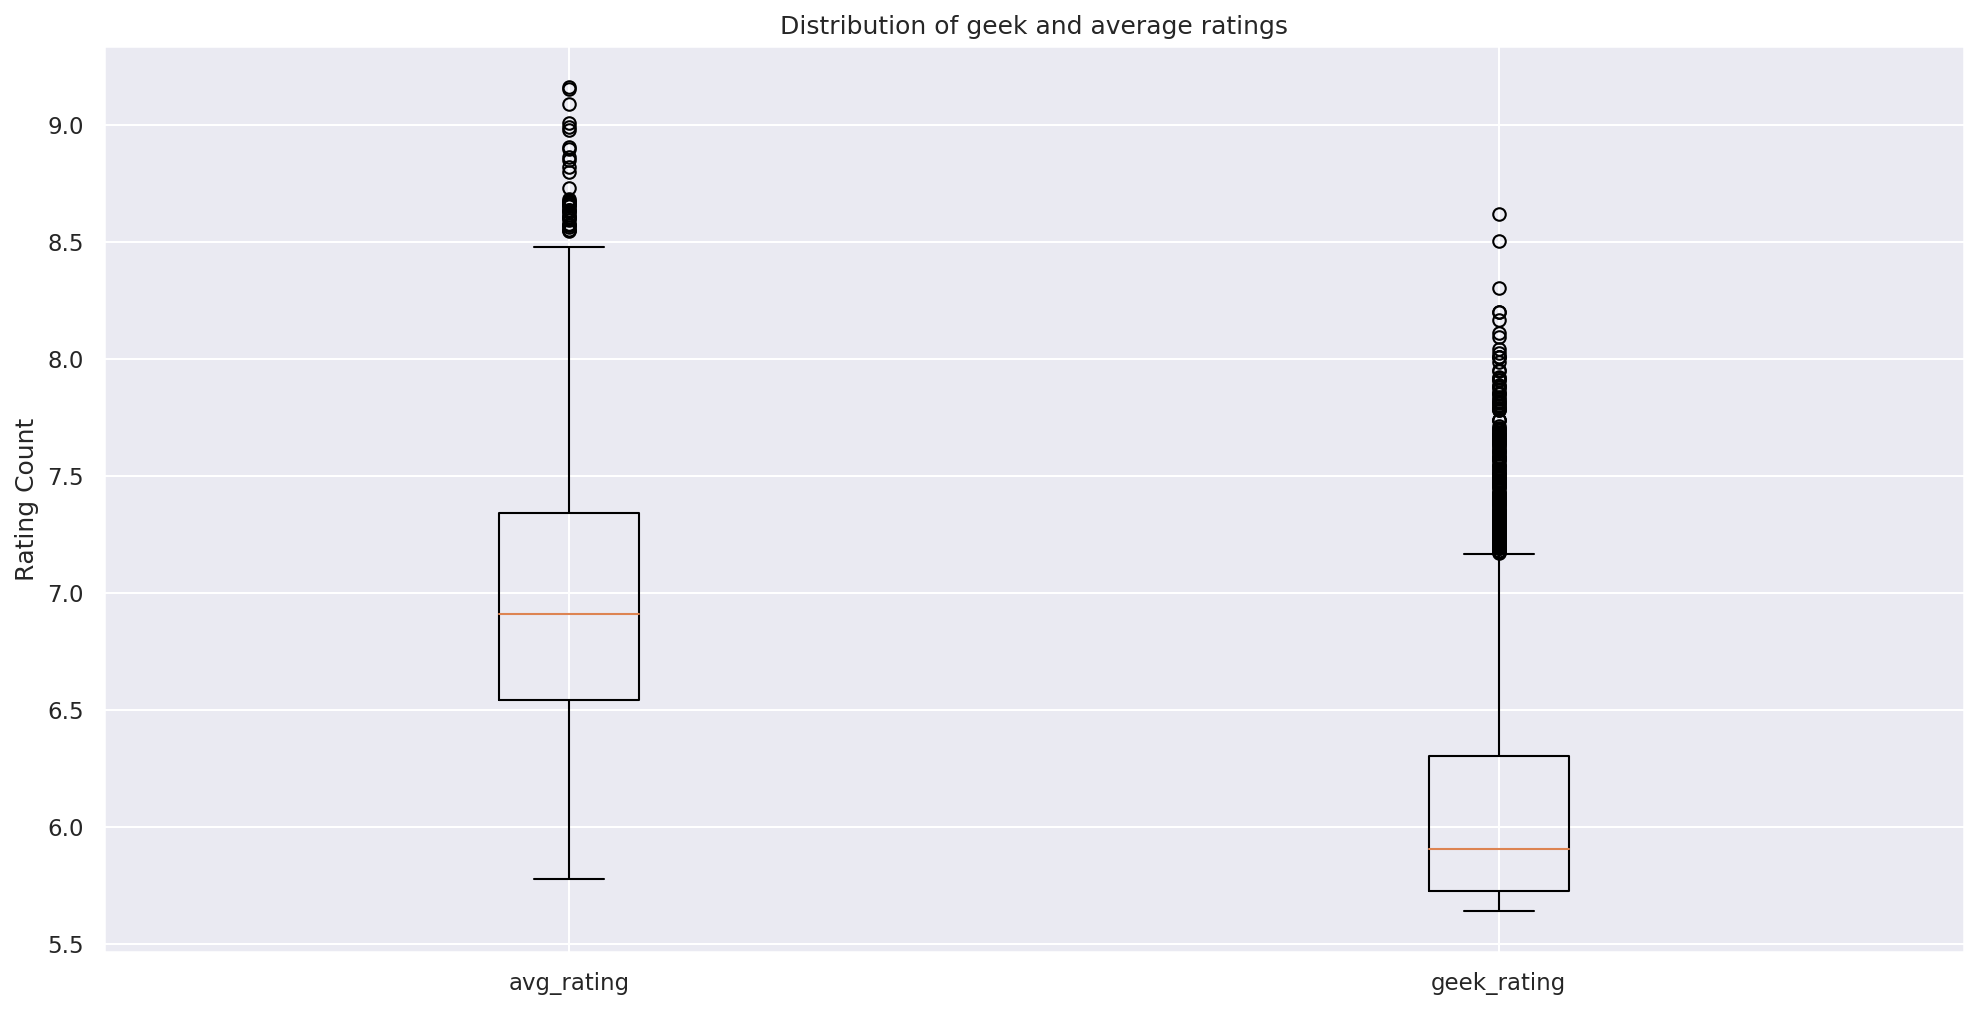

In [90]:
plt.boxplot(games[["avg_rating", 'geek_rating']].values, labels = ["avg_rating", 'geek_rating']);
plt.ylabel("Rating Count")
plt.title("Distribution of geek and average ratings")

We see that the median is higher for the avg_rating than the geek_rating and also has outliers that are much larger in the rating in the geek_ratings. The 75th percentile of the avg_rating is shown as voted higher than all the geek_ratings. 

## 4. Linear models

In this last part, we are going to create linear models to predict various parts of your data. First, as in the previous parts, pick a quantititative variable $y$ which you would like to predict and another quantitative variable $x$ which you think will be predictive of $y$. 

### 4.1. Preliminary plotting

Before we actually fit a linear model, we should make sure that there is a somewhat linear relationship between our two variables. <span style="color:blue"> Plot a scatterplot of $x$ and $y$ and verify that the relationship looks somewhat linear. </span> If it looks like there is some relationship but it is nonlinear, you can try [straightening the data](https://rstudio-pubs-static.s3.amazonaws.com/199830_f5e58983719e4ffc8d60fd277f9352e5.html) by applying transformations such as $x^2$ or $\sqrt{x}$ to the axes; alternatively, you can just try to find a different $x$ or $y$ variable.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


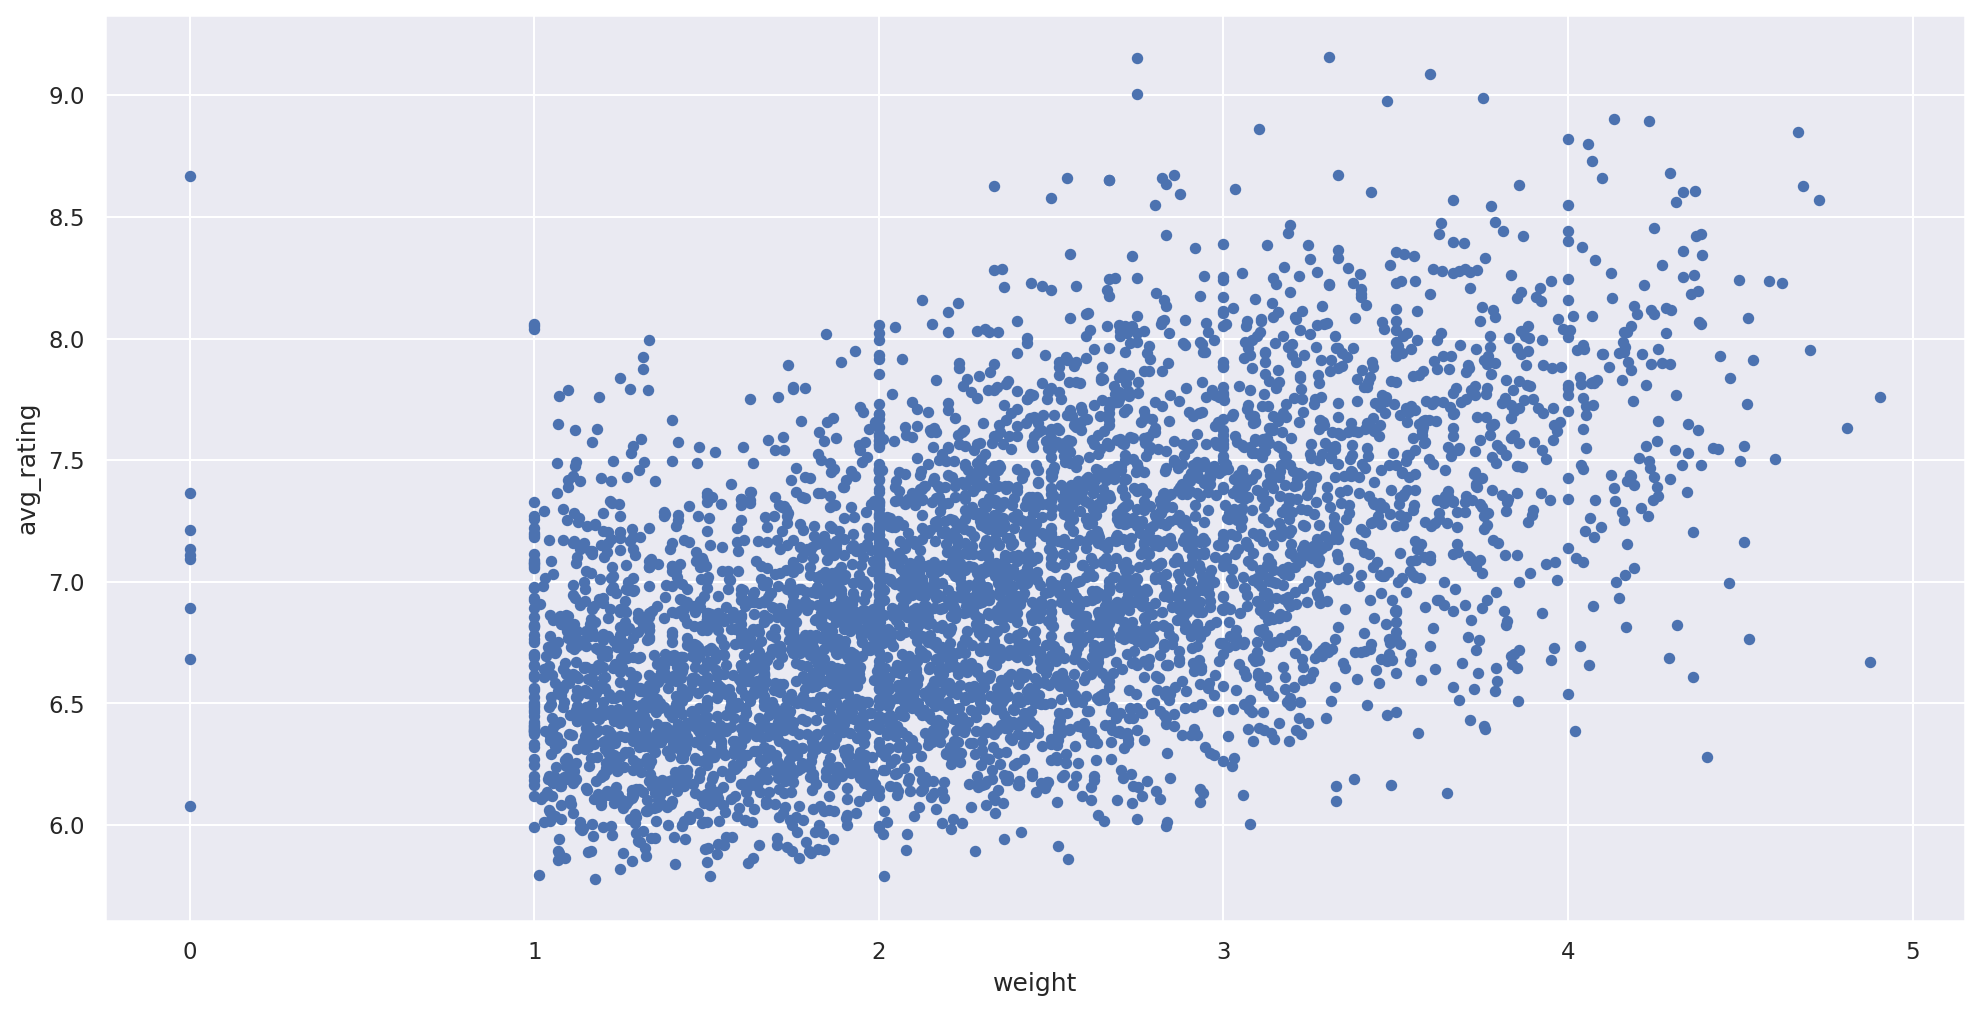

In [103]:
x1 = 'weight'
y1 = 'avg_rating'
games.plot(x=x1,y=y1, kind='scatter');

### 4.2. Creating the model
Let's try creating a linear model!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


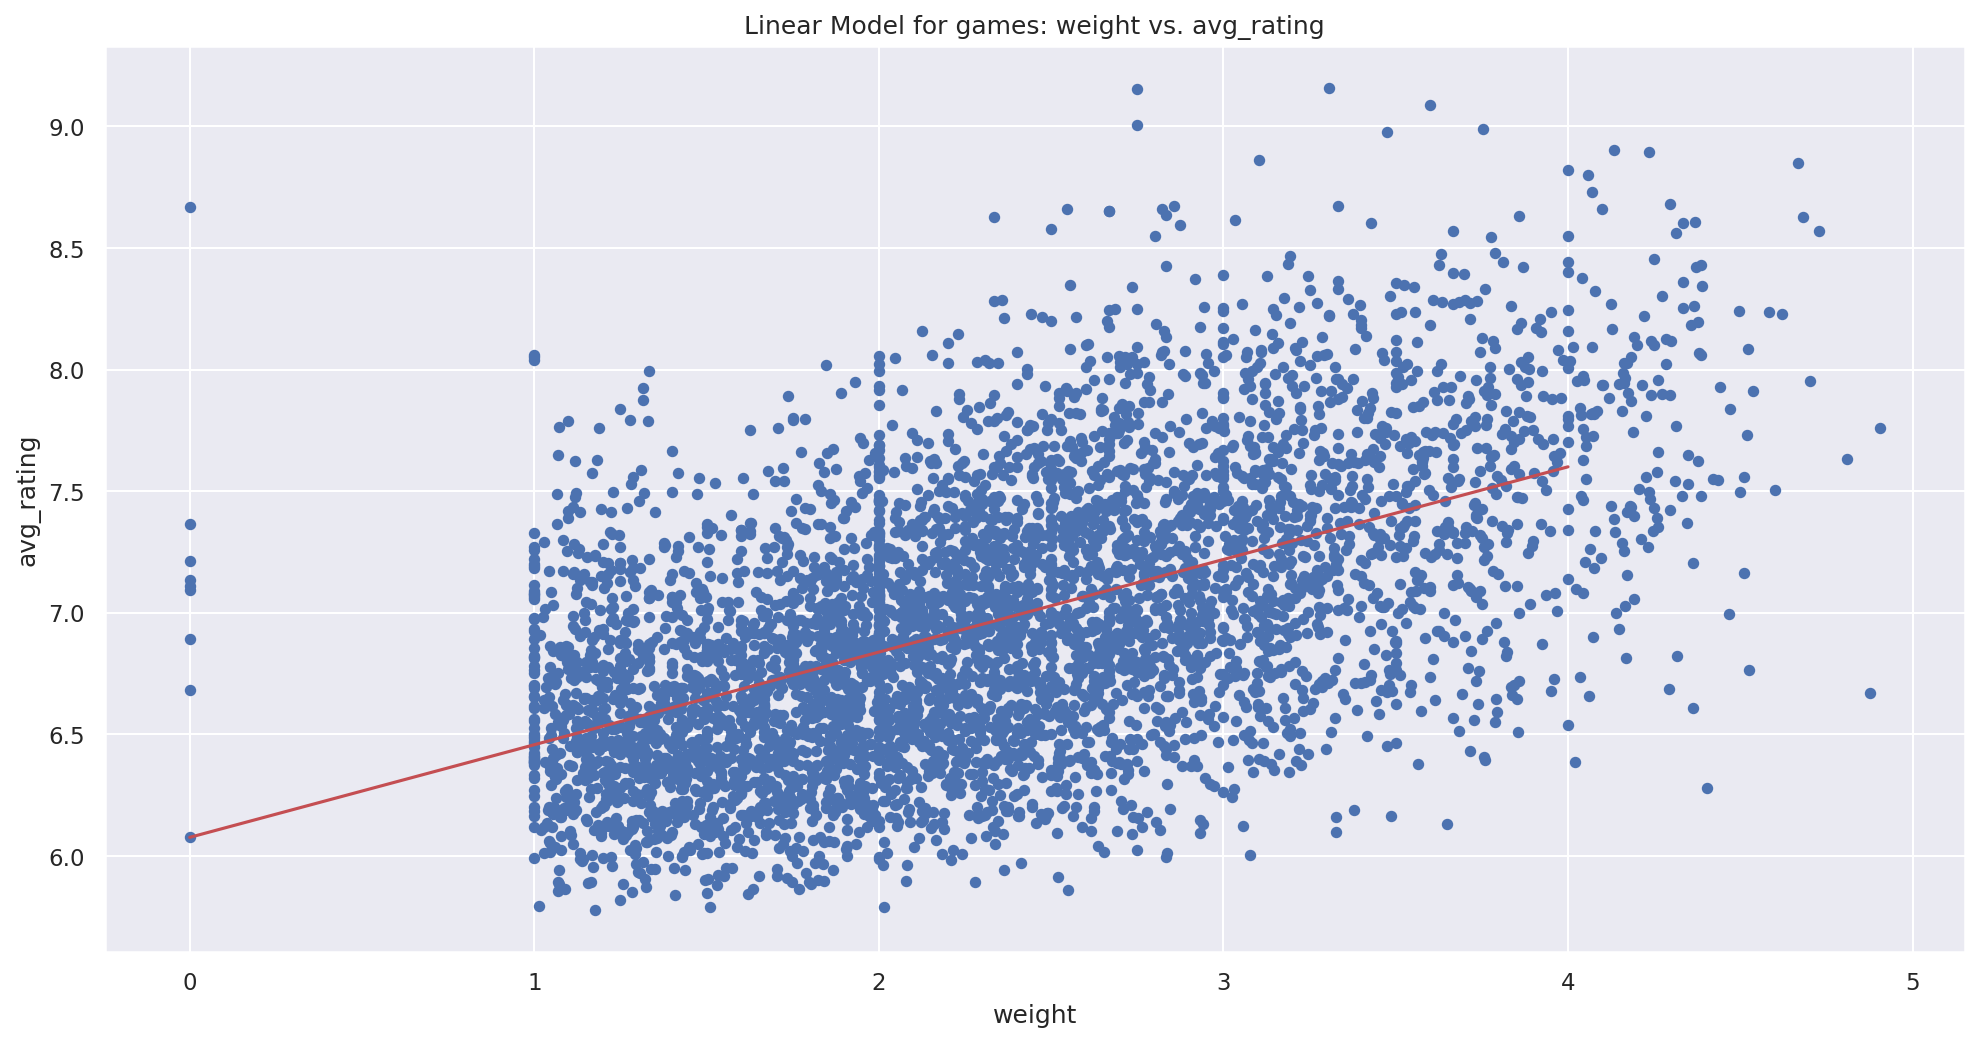

In [110]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
X = games[['weight']]
Y = games[['avg_rating']]
linear_model.fit(X, Y)

def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    x = np.arange(max(data[x_name])).reshape(-1, 1) # a 2D array of integers between 0 and the maximum value of the x_name column
    y = linear_model.predict(x) # replace ___ with correct function 
    
    
    data.plot.scatter(x_name, y_name) # scatter plot of x_name vs. y_name
    
    plt.plot(x,y, color = 'r')
    plt.title("Linear Model for games: " + x_name + " vs. " + y_name)
    plt.show()

overlay_simple_linear_model(games, 'weight',"avg_rating", linear_model)

### 4.3. Assessing the model
Next, let's assess the validity of our model.<span style="color:blue"> Find the $R^2$ value and write an explanation of what that value means.</span>

In [111]:
linear_model.score(X, Y)

0.29947654217971575

Although the data plot appear overall to have a linear relationship, the relationship is not mostly linear, thus the R^2 value is not above 0.5. This means that ~30% of the variation in avg_rating is explained by weight in the regression model above.

Next,<span style="color:blue"> add an additional column to your dataframe with the residuals from your linear model, and make a plot of the residuals against $x$.</span> (Recall that the $i$th residual is given by $y_i - \hat y_i$, where $\hat y_i$ is your predicted value for $y_i$.)

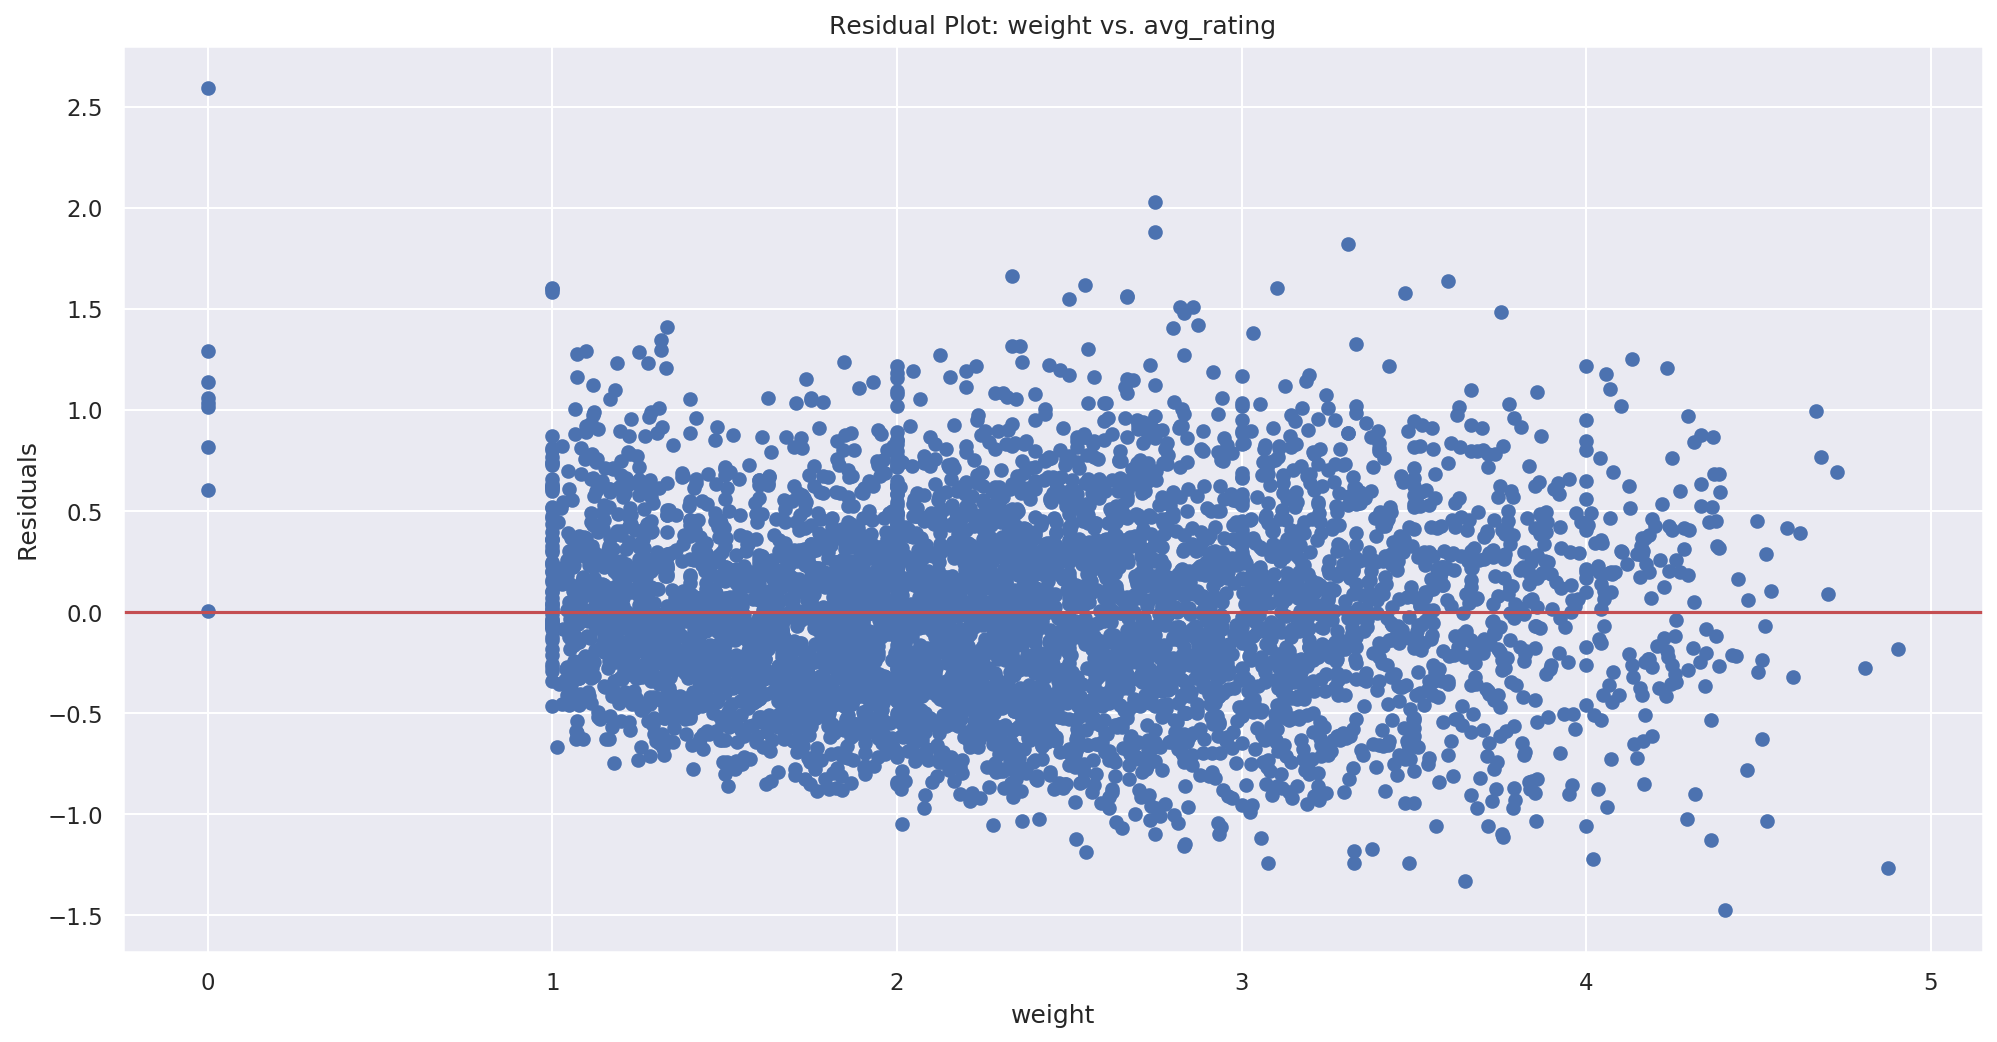

In [112]:
def plot_simple_residuals(data, x_name, y_name, linear_model):
    X = data[[x_name]]
    Y = data[[y_name]]
    residuals = Y - linear_model.predict(X)
    
    plt.scatter(X, residuals) # plot residuals
    plt.axhline(y=0, color='r', linestyle='-') # plots line at y = 0
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.xlabel(x_name)
    plt.ylabel("Residuals")
    plt.show()
    
plot_simple_residuals(games, 'weight', 'avg_rating', linear_model)

The residual plot looks like random noise for the most part.

### 4.4. MSE Breakdown

Another common metric used for evaluating linear models is the **mean squared error** or MSE. This is just the average of all the squared errors: 
$$MSE := \frac{1}{n}\sum_{i=1}^n \left(y_i-\hat y_i\right)^2$$

Note that you can compute this by taking the average of the squares of the residuals.

In [127]:
from sklearn import metrics  
np.sqrt(metrics.mean_squared_error(Y, linear_model.predict(X)))

0.47102249953733905

Our MSE was ~0.471. This measures the average of the squares of the errors.